In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load CSV ===
df = pd.read_csv("/Users/heerkubadia/Desktop/Sem-7/SET/Fuzzer/humaneval_results_gpt-4o-2024-05-13.csv")


In [9]:

# --- Normalize pass columns ---
# for col in ['base_passed', 'mutated_passed']:
#     if col in df.columns:
#         df[col] = df[col].astype(str).str.lower().isin(['true', '1'])

print(f"Loaded {len(df)} rows ✅")

# === Pass Rates ===
base_pass_rate = df['base_passed'].mean() * 100/10
mut_pass_rate = df['mutated_passed'].mean() * 100/10

print("=== ✅ Pass Rates ===")
print(f"Original Code Pass Rate: {base_pass_rate:.2f}%")
print(f"Mutated Code Pass Rate:  {mut_pass_rate:.2f}%")


Loaded 163 rows ✅
=== ✅ Pass Rates ===
Original Code Pass Rate: 99.08%
Mutated Code Pass Rate:  98.40%



=== 📊 Similarity (Difflib) Distribution ===
   0–10%: 48 samples
  10–20%: 31 samples
  20–30%: 15 samples
  30–40%: 6 samples
  40–50%: 9 samples
  50–60%: 10 samples
  60–70%: 7 samples
  70–80%: 8 samples
  80–90%: 7 samples
 90–100%: 21 samples


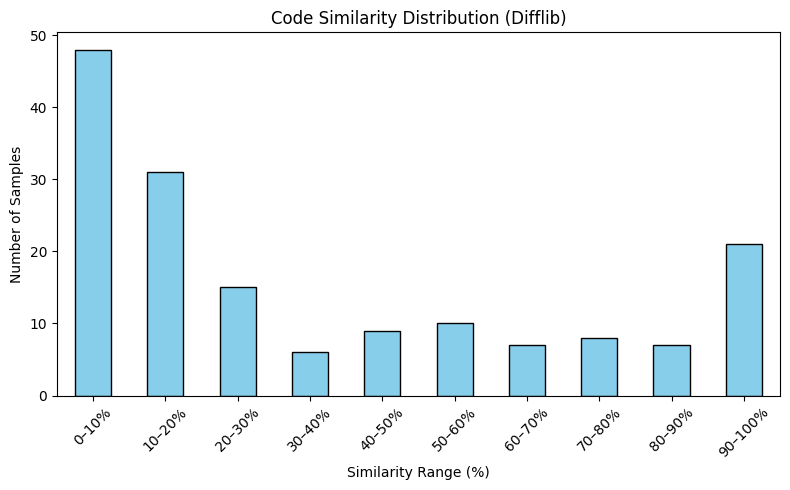

In [10]:
#task_id,original_prompt,llm_mutated_prompt,radamsa_mutated_prompt,base_code,mutated_code,base_passed,mutated_passed,similarity,codebertscore,test_output_base,test_output_mutated

# === Similarity Histogram ===
if 'similarity' in df.columns:
    df = df[df['similarity'] >= 0]
    bins = np.arange(0, 1.1, 0.1)
    df['similarity_bin'] = pd.cut(df['similarity'], bins=bins,
                                  labels=[f"{int(b*100)}–{int(b*100+10)}%" for b in bins[:-1]])
    sim_counts = df['similarity_bin'].value_counts().sort_index()

    print("\n=== 📊 Similarity (Difflib) Distribution ===")
    for bin_label, count in sim_counts.items():
        print(f"{bin_label:>8}: {count} samples")

    plt.figure(figsize=(8, 5))
    sim_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Code Similarity Distribution (Difflib)")
    plt.xlabel("Similarity Range (%)")
    plt.ylabel("Number of Samples")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


=== 🤖 CodeBERTScore (F1) Distribution ===
   0–10%: 0 samples
  10–20%: 0 samples
  20–30%: 0 samples
  30–40%: 0 samples
  40–50%: 0 samples
  50–60%: 0 samples
  60–70%: 0 samples
  70–80%: 12 samples
  80–90%: 76 samples
 90–100%: 75 samples


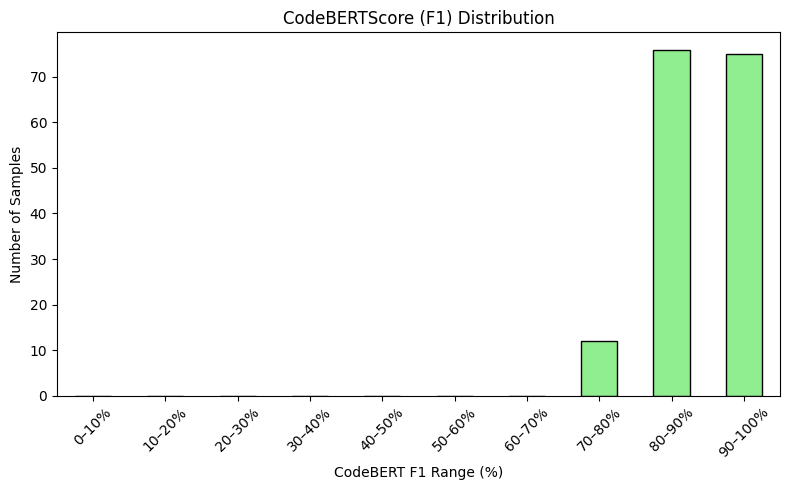

In [11]:


# === CodeBERTScore Histogram ===
if 'codebertscore' in df.columns:
    df = df[df['codebertscore'] >= 0]
    bins = np.arange(0, 1.1, 0.1)
    df['codebert_bin'] = pd.cut(df['codebertscore'], bins=bins,
                                labels=[f"{int(b*100)}–{int(b*100+10)}%" for b in bins[:-1]])
    cb_counts = df['codebert_bin'].value_counts().sort_index()

    print("\n=== 🤖 CodeBERTScore (F1) Distribution ===")
    for bin_label, count in cb_counts.items():
        print(f"{bin_label:>8}: {count} samples")

    plt.figure(figsize=(8, 5))
    cb_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title("CodeBERTScore (F1) Distribution")
    plt.xlabel("CodeBERT F1 Range (%)")
    plt.ylabel("Number of Samples")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

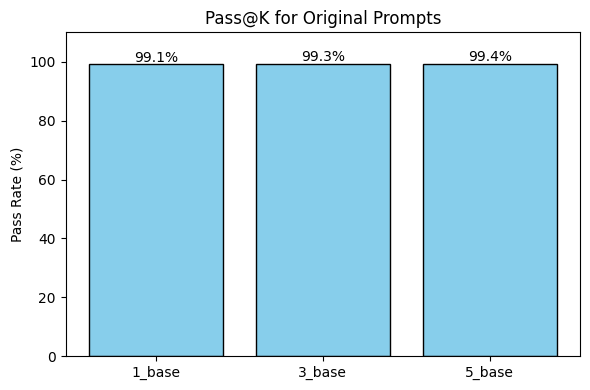

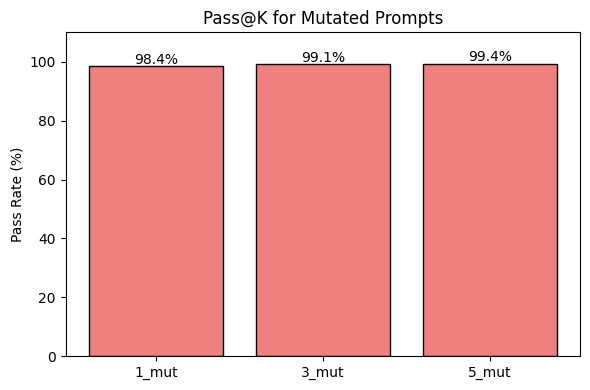

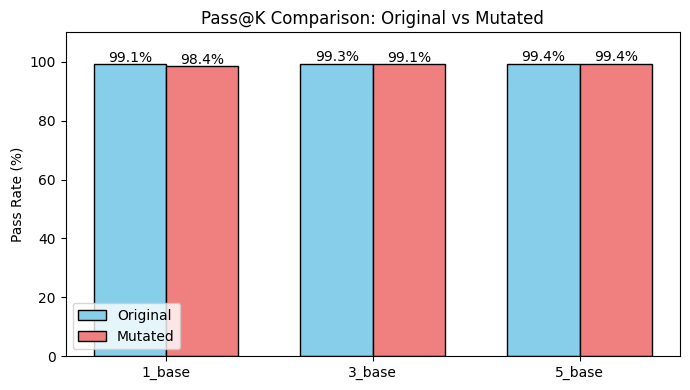

In [12]:
# === Pass@K Plots ===
pass_k_cols_base = ['pass@1_base', 'pass@3_base', 'pass@5_base']
pass_k_cols_mut = ['pass@1_mut', 'pass@3_mut', 'pass@5_mut']

def plot_pass_at_k(df, cols, title, color):
    values = [df[col].mean()*100 for col in cols if col in df.columns]
    labels = [col.split('@')[1] for col in cols if col in df.columns]
    plt.figure(figsize=(6,4))
    plt.bar(labels, values, color=color, edgecolor='black')
    plt.title(title)
    plt.ylabel("Pass Rate (%)")
    plt.ylim(0, 110)
    for i, v in enumerate(values):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center')
    plt.tight_layout()
    plt.show()

if any(col in df.columns for col in pass_k_cols_base):
    plot_pass_at_k(df, pass_k_cols_base, "Pass@K for Original Prompts", "skyblue")
if any(col in df.columns for col in pass_k_cols_mut):
    plot_pass_at_k(df, pass_k_cols_mut, "Pass@K for Mutated Prompts", "lightcoral")

# === Compare Base vs Mutated Pass@K Side by Side ===
if all(col in df.columns for col in pass_k_cols_base + pass_k_cols_mut):
    base_vals = [df[col].mean()*100 for col in pass_k_cols_base]
    mut_vals  = [df[col].mean()*100 for col in pass_k_cols_mut]
    labels = [col.split('@')[1] for col in pass_k_cols_base]

    x = np.arange(len(labels))
    width = 0.35
    plt.figure(figsize=(7,4))
    plt.bar(x - width/2, base_vals, width, label='Original', color='skyblue', edgecolor='black')
    plt.bar(x + width/2, mut_vals, width, label='Mutated', color='lightcoral', edgecolor='black')
    plt.xticks(x, labels)
    plt.ylabel("Pass Rate (%)")
    plt.title("Pass@K Comparison: Original vs Mutated")
    plt.ylim(0, 110)
    for i, (b, m) in enumerate(zip(base_vals, mut_vals)):
        plt.text(i - width/2, b+1, f"{b:.1f}%", ha='center')
        plt.text(i + width/2, m+1, f"{m:.1f}%", ha='center')
    plt.legend()
    plt.tight_layout()
    plt.show()